# Лаборатоная работа №5

# Кластеризация

<div style = "font-size: 16px">
    <p><b>Цель работы: </b>научиться производить кластерный анализ данных с
использованием метода К-средних.<p>
    <p>Набор данных содержит измерения геометрических свойств зерен, принадлежащих трем разным сортам пшеницы. Для построения данных были измерены семь геометрических параметров зерен пшеницы с реальными значениями. Использовались метод мягкого рентгеновского излучения и пакет GRAINS. Все эти параметры были действительными непрерывными.</p>
    <p>Атрибуты:</p>
    <ul>
    <li> <b>area</b> – область A,</li>
    <li> <b>perimeter</b> – периметр P,</li>
    <li> <b>compactness</b> – компактность C = 4piA/P^2,</li>
    <li> <b>length of kernel</b> – длина ядра,</li>
    <li> <b>width of kernel</b> – ширина ядра,</li>
    <li> <b>asymmetry coefficient</b> – коэффициент асимметрии</li>
    <li> <b>length of kernel groove</b> – длина канавки ядра.</li>
    </ul>
</div>

### 1. Импортируйте необходимые библиотеки

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("seeds.csv")
df.head()

,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


### 2. Получим информацию о датасете

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         210 non-null    float64
 1   perimeter    210 non-null    float64
 2   compactness  207 non-null    float64
 3   length       210 non-null    float64
 4   width        209 non-null    float64
 5   asymmetry    210 non-null    float64
 6   length.1     210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### 3. Проверяем данные на наличие пропущенных значений и выбросов

In [22]:
# проверяем на пропущенные значения
print(df.isnull().sum())

area           0
perimeter      0
compactness    3
length         0
width          1
asymmetry      0
length.1       0
dtype: int64


In [25]:
df_copy = df.copy()
# Заполняем пропуски средним арифметическим через метод mean()
df_copy['compactness'] = df_copy['compactness'].fillna(df_copy['compactness'].mean())
df_copy['width'] = df_copy['width'].fillna(df_copy['width'].mean())
# Убедимся, что пропусков не осталось
df_copy.isna().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
length.1       0
dtype: int64

### 4. Применяем операцию нормализации для численной устойчивости

In [27]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler  = StandardScaler()
scaler

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


### 5. Приведем данные к единому масштабу

In [28]:
X = scaler.fit_transform(df_copy)
X[:5]

array([[ 0.14209777,  0.21546244, -0.01211768,  0.27731987,  0.07312659,
        -0.98724908, -0.35627667],
       [ 0.01118803,  0.00822376,  0.42543735, -0.01381585,  0.1233775 ,
        -1.79379362, -0.85822017],
       [-0.19206658, -0.36020056,  1.46083983, -0.38017323,  0.13294911,
        -0.66677669, -1.10729062],
       [-0.34709127, -0.47533316,  1.04927818, -0.33420444,  0.23345094,
        -0.9617722 , -1.14531664],
       [ 0.44525718,  0.33059504,  1.39152419,  0.13105552,  0.67135177,
        -1.56785388, -0.44183522]])

### 6. Определяем оптимальное количество кластеров с помощью метода локтя

In [29]:
from sklearn.cluster import KMeans

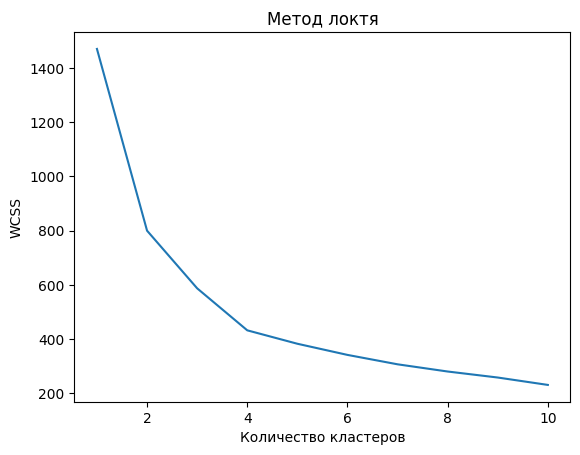

In [30]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

### 7. Обучаем модель кластеризации

In [33]:
# создадим экземпляр модели
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# обучаем модель на стандартизированных данных
kmeans.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


### 8. Предсказываем кластеры и визуализируем результаты

In [34]:
# предсказываем кластеры для каждого
clusters = kmeans.predict(X)
# добавляем метки кластеров в исходные данные
df_copy['cluster'] = clusters
df_copy.head()

,area,perimeter,compactness,length,width,asymmetry,length.1,cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,4
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,4


### 9. Визуализация результатов

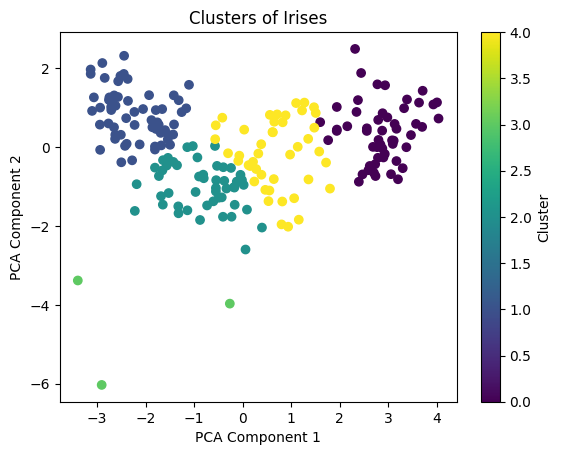

In [35]:
from sklearn.decomposition import PCA

# Уменьшаем размерность до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Irises')
plt.colorbar(label='Cluster')
plt.show()

In [36]:
# Группируем по кластерам
cluster_groups = df_copy.groupby('cluster')
# Анализ средних значений в каждом кластере
cluster_groups.mean()

,area,perimeter,compactness,length,width,asymmetry,length.1
cluster,,,,,,,
0,18.993962,16.405849,0.886443,6.246094,3.756472,3.534981,6.104151
1,11.830656,13.250984,0.845938,5.242541,2.834721,4.962361,5.133574
2,13.467551,13.859796,0.879963,5.341163,3.147245,2.638124,4.981204
3,12.793333,13.666667,0.871280,0.851600,4.565480,3.708333,4.580333
4,15.712273,14.988636,0.878477,5.757114,3.390455,3.299775,5.478705


### 10. Визуализация по нескольким парам разных признаков с указанием центроид

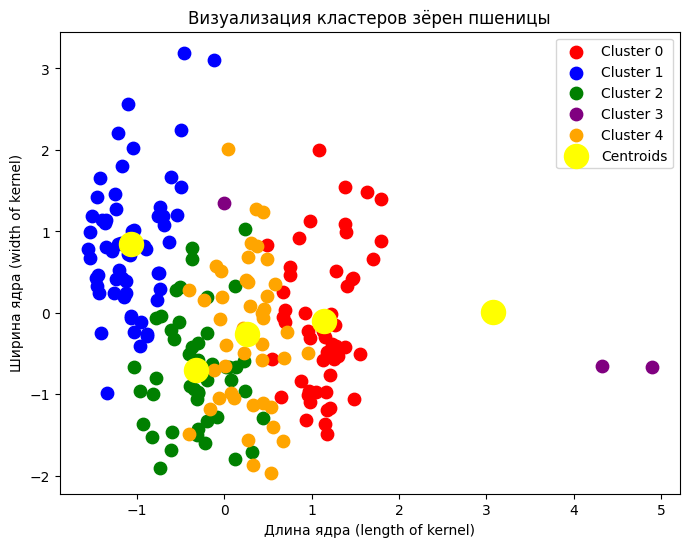

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(X[clusters == 0,4], X[clusters == 0,5], s = 80, c = 'red', label = 'Cluster 0')
plt.scatter(X[clusters == 1,4], X[clusters == 1,5], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(X[clusters == 2,4], X[clusters == 2,5], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(X[clusters == 3,4], X[clusters == 3,5], s = 80, c = 'purple', label = 'Cluster 3')
plt.scatter(X[clusters == 4,4], X[clusters == 4,5], s = 80, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,4], kmeans.cluster_centers_[:,5], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Визуализация кластеров зёрен пшеницы')
plt.xlabel('Длина ядра (length of kernel)')
plt.ylabel('Ширина ядра (width of kernel)')
plt.legend()
plt.show()

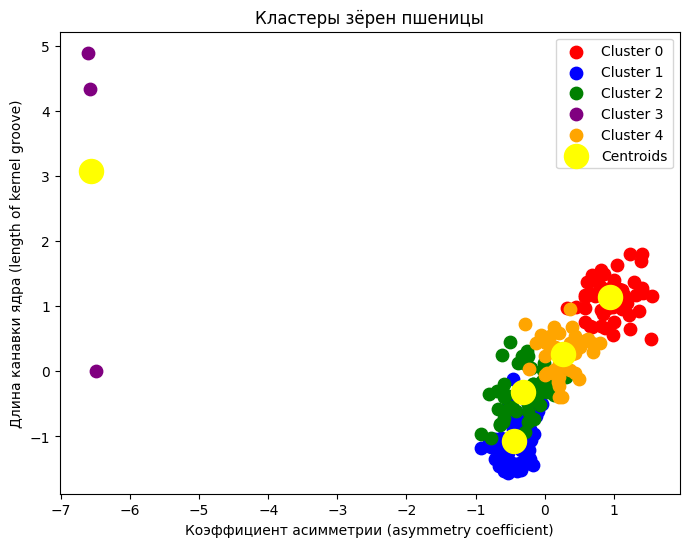

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(X[clusters == 0,3], X[clusters == 0,4], s = 80, c = 'red', label = 'Cluster 0')
plt.scatter(X[clusters == 1,3], X[clusters == 1,4], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(X[clusters == 2,3], X[clusters == 2,4], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(X[clusters == 3,3], X[clusters == 3,4], s = 80, c = 'purple', label = 'Cluster 3')
plt.scatter(X[clusters == 4,3], X[clusters == 4,4], s = 80, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,4], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры зёрен пшеницы')
plt.xlabel('Коэффициент асимметрии (asymmetry coefficient)')
plt.ylabel('Длина канавки ядра (length of kernel groove)')
plt.legend()
plt.show()